# Dev Plots

This notebook is to develop plots that will be used for anomoly and outlier detection.

Created by: TW \
Created on: 2025-03-13 \
Environment: python_20240807

## Library

In [2]:
# data processing and modeling libraries
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import plotly
import seaborn as sns


# other libraries
import csv
from datetime import datetime
import os
import re
import shutil

## Code

Dataframes containing data to plot

In [3]:
df_basic_flow_meter_data = pd.read_csv('../dev_data/simulated_data_basic_flow_meter_20250219.csv', index_col=0 )
df_basic_flow_meter_data.index = pd.to_datetime(df_basic_flow_meter_data.index)

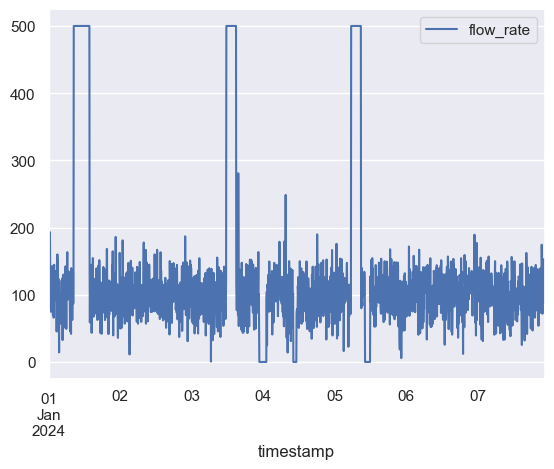

In [130]:
df_basic_flow_meter_data.plot();

#### single boxplot

In [ ]:
def plot_box_plot(df: pd.DataFrame, data_label: str = "Data", plot_title: str = "Box Plot", jitter: bool = False):
    """
    Thee function takes in a Pandas dataframe where the data to be plotted is in the first column and creates a single boxplot

    Args:
        df (pd.DataFrame): Pandas dataframe where the first column is selected or Numpy series that contains the data

        data_label (str, optional): This is the name of the data that is being plotted. Defaults to "Data".

        plot_title (str, optional): Adds a title to the boxplot graph. Defaults to "Box Plot".

        jitter (bool, optional): spatially separates outliers to better understand if there is overlay of the data points.  Default is False.
    """
    
    #validate the data
    data_label = f"{data_label}"
    plot_title = f"{plot_title}"
    
    if not isinstance(df, (pd.DataFrame, pd.core.series.Series)):
        raise ValueError("Data must be in a pd.dataframe np.ndarray")
    
    if isinstance(df, pd.DataFrame):
        dat = df.iloc[:,0]
    
    #create plot
    sns.set_theme(style="darkgrid")
    fig, ax = plt.subplots(figsize=(6, 3))
    
    #add jitter for outliers
    if jitter:
        ax = sns.boxplot(data=dat, orient="h", width=0.40, fliersize= 4 )
        for artist in ax.lines:
            if artist.get_linestyle() == "None":
                pos = artist.get_ydata()
                artist.set_ydata(pos + np.random.uniform(-.05, .05, len(pos)))
    else:
        ax = sns.boxplot(data=dat, orient="h", width=0.40)

    plt.xlabel(data_label)
    plt.title(plot_title, fontdict={'size':16, 'weight': 'bold'})
    plt.show()
    
    
    

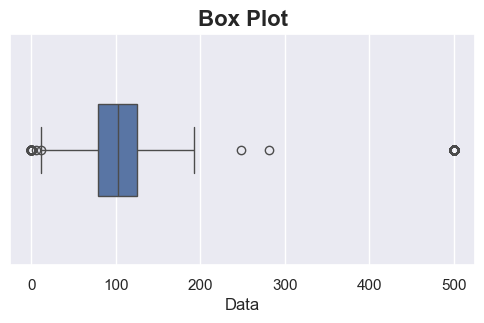

In [7]:
plot_box_plot(df=df_basic_flow_meter_data, jitter=0)

#### Histogram Plot

In [ ]:
def plot_historgram(df: pd.DataFrame, plot_title: str = "Histrogram Plot", data_label: str = "Data" ):
    """
    The function takes a dataframe or a series and creates a histogram.

    Args:
        df (pd.DataFrame): Pandas dataframe where the first column is slected or Numpy series that contains the data

        data_label (str, optional): This is the name of the data that is being plotted. Defaults to "Data".

        plot_title (str, optional): Adds a title to the boxplot graph. Defaults to "Box Plot".

    """
    #validate the data
    data_label = f"{data_label}"
    plot_title = f"{plot_title}"

    if not isinstance(df, (pd.DataFrame, pd.core.series.Series)):
        raise ValueError("Data must be in a pd.dataframe np.ndarray")

    if isinstance(df, pd.DataFrame):
        dat = df.iloc[:,0]

    # create histogram plot
    sns.set_theme(style=('darkgrid'))
    ax,fig = plt.subplots(figsize=(8,6))

    sns.histplot(data=df['flow_rate'])

    plt.xlabel(data_label)
    plt.title(plot_title, fontdict={'size':16, 'weight': 'bold'})
    plt.show()

Code Testing

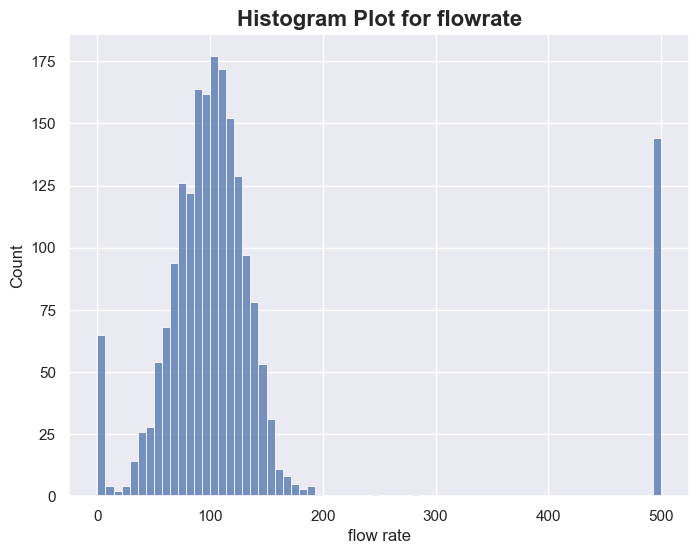

In [ ]:
x = pd.Series([1,2,3])
x1 = "cow"
plot_historgram(df=df_basic_flow_meter_data, data_label="flow rate", plot_title="Histogram Plot for Flowrate" )

#### Line plot that highlights the outliers

In [ ]:
def plot_times_series_with_outliers(df: pd.DataFrame, data_label: str = "Data", plot_title: str = "Times Series with Outliers"): 
    """
    This function takes in a Pandas dataframe and returns a line plot with the outliers highlighted as red points.  
    
    Args:
        df (pd.DataFrame): DataFrame with timestamp index, data in the first column, and the second column contains a boolean (1 = outliers and 0 = not outlier).
        data_label (str, optional): The label for the y-axis on the time series line plot.  Defaults to "Data".
        plot_title (str, optional): The title for the plot.  Defaults to "Time Series with Outliers".
    """
    # Valudate data types
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("DataFrame index must be a DatetimeIndex")
    
    data_label = str(data_label)
    plot_title = str(plot_title)

    # Create Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot the full time series in blue
    ax.plot(df.index, df.iloc[:,0], color='blue', linewidth=1.5, label= data_label)
    
    # Plot the outliers in red
    outliers = df[df.iloc[:,1] == True]
    if not outliers.empty:
        ax.scatter(outliers.index, outliers.iloc[:,0], color='red', s=10,
                  label='Outliers', zorder=5)
    
    
    ax.set_title(plot_title, fontsize=14)
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel(data_label, fontsize=12)
    
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    
    plt.tight_layout()

str